# A Text Classification of Milwaukee Bucks's Fan Reactions

## Collecting and Preparing the Data

In [ ]:
# Importing the Necessary Modules
from tqdm import tqdm
import pandas as pd
import praw
import tensorflow
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import punkt

In [ ]:
# Accessing API
user_agent = "Scraper 1.0 by u/colloj"

reddit = praw.Reddit(client_id='-RlNNaCimqKKkJ_aX1FcKg',
                     client_secret='4vSZ7Dm4rtDYXevU8PtIiIK6dtD_Ng',
                     user_agent= user_agent)

In [ ]:
# Getting the Data
subreddit_name = 'MkeBucks'

# Define the string you want to search for in post titles
search_string = '[POSTGAME THREAD] Our Milwaukee Bucks'
start_date = '2023-10-23'

post_names = []
comments = []

for submission in reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene'):
    if '[POSTGAME THREAD]' in submission.title:
        print(submission.title)


In [ ]:
# Getting the Data
subreddit_name = 'MkeBucks'

# Define the string you want to search for in post titles
search_string = '[POSTGAME THREAD] Our Milwaukee Bucks'
start_date = '2023-10-23'

post_names = []
comments = []

total_submissions = len(list(reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene')))

for submission in tqdm(reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene'), total = total_submissions):
    if '[POSTGAME THREAD]' in submission.title:
        submission.comments.replace_more(limit=None)
        for comment in submission.comments.list():
            comments.append(comment.body)
            post_names.append(submission.title)

post_names, comments

In [ ]:
# Create a DataFrame from the lists
df = pd.DataFrame({'Post_Name': post_names, 'Comment': comments})

# Display the DataFrame
df.head()

In [2]:
df.to_csv("bucks.csv", index = False)

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv("bucks.csv")
df.head()

,Post_Name,Comment
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they..."
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh..."


In [3]:
# Getting the Dates
def get_after_last_space(string):
    return string.split(' ')[-1]
df["Date"] = df["Post_Name"].apply(get_after_last_space)
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,1/3/2024
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,1/3/2024
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",1/3/2024
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,1/3/2024
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",1/3/2024


In [4]:
df["Date"].unique()

array(['1/3/2024', '3/4/2024', '2/15/2024', '10/26/2023', '1/31/2024',
       '3/8/2024', '3/10/2024', '11/1/2023', '11/8/2023', '1/6/2024',
       '1/27/2024', '2/03/2024', '11/6/2023', '1/8/2024', '1/11/2024',
       '2/25/2024', '2/23/2024', '11/11/2023', '3/14/2024', '1/14/2024',
       '11/22/2023', '1/4/2024', '11/18/2023', '11/24/2023', '2/04/2024',
       '3/1/2024', '1/1/2024', '3/12/2024', '04/26/2023', '1/24/2024',
       '2/12/2024', '12/11/2023', '10/20/2023', '2/13/2024', '2/8/2024',
       '11/9/2023', '12/23/2023', '3/6/2024', '11/28/2023', '11/30/2023',
       '1/20/2024', '2/27/2024', '12/13/2023', '11/15/2023', '1/13/2024',
       '11/17/2023', '12/2/2023', '12/17/2023', '12/27/2023', '2/06/2024',
       '10/29/2023', '12/29/2023', '1/17/2024', '11/26/2023',
       '12/21/2023', '11/20/2023', '1/22/2024', '1/26/2024', '04/24/2023',
       '12/19/2023', '12/16/2023', '2/9/2024', '2/29/2024', '11/13/2023',
       '04/22/2023', '04/19/2023', '11/3/2023', '04/16/2023', '

In [5]:
df = df[df["Date"] != "round"]
df["Date"].unique()

array(['1/3/2024', '3/4/2024', '2/15/2024', '10/26/2023', '1/31/2024',
       '3/8/2024', '3/10/2024', '11/1/2023', '11/8/2023', '1/6/2024',
       '1/27/2024', '2/03/2024', '11/6/2023', '1/8/2024', '1/11/2024',
       '2/25/2024', '2/23/2024', '11/11/2023', '3/14/2024', '1/14/2024',
       '11/22/2023', '1/4/2024', '11/18/2023', '11/24/2023', '2/04/2024',
       '3/1/2024', '1/1/2024', '3/12/2024', '04/26/2023', '1/24/2024',
       '2/12/2024', '12/11/2023', '10/20/2023', '2/13/2024', '2/8/2024',
       '11/9/2023', '12/23/2023', '3/6/2024', '11/28/2023', '11/30/2023',
       '1/20/2024', '2/27/2024', '12/13/2023', '11/15/2023', '1/13/2024',
       '11/17/2023', '12/2/2023', '12/17/2023', '12/27/2023', '2/06/2024',
       '10/29/2023', '12/29/2023', '1/17/2024', '11/26/2023',
       '12/21/2023', '11/20/2023', '1/22/2024', '1/26/2024', '04/24/2023',
       '12/19/2023', '12/16/2023', '2/9/2024', '2/29/2024', '11/13/2023',
       '04/22/2023', '04/19/2023', '11/3/2023', '04/16/2023'],


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03


In [7]:
# Getting Data For This Season
df = df[df["Date"] >= "2023-10-26"]
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03


In [8]:
# Number of Games
len(df["Post_Name"].unique())

64

In [9]:
# Number of Columns
len(df)

12266

In [10]:
# Create the Result Column
def label_column(string):
    if any(word in string for word in ["defeat", "trounce", "beat"]):
        return "Win"
    elif any(word in string for word in ["fall", "sputter", "are defeated"]):
        return "Loss"
    else:
        return "Unknown"
df["Result"] = df["Post_Name"].apply(label_column)
df.head()

,Post_Name,Comment,Date,Result
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss


In [11]:
# Sorting Dataframe By Date
df = df.sort_values(by = "Date").reset_index(drop = True)

In [12]:
df.head()

,Post_Name,Comment,Date,Result
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win


### Prepare Comments for Modeling

In [32]:
# Tokenize, then rejoin
def tokenize(document):
    # YOUR CODE HERE
    document = document.split()
    
    for item in document:
        document = [re.sub(r'^\W+|\W+$', "", item) for item in document]
            
    document = [item.lower() for item in document]
    
    document = " ".join(document)
    
    return document

df["Comment_Adj"] = df["Comment"].apply(tokenize)
df.head()

,Post_Name,Comment,Date,Result,No_Stop,Stemmed,Result_Bin,Comment_Adj
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,considered Damian Lillard ?,consid damian lillard ?,1,but have you considered damian lillard
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,Help Dame flair : ),help dame flair : ),1,help yourself to a dame flair
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,"casual 30 point games nba , ’ good reason ’ ob...","casual 30 point game nba , ’ good reason ’ obs...",1,the most casual 30 point games in the nba ther...
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,Dame regularly went nuclear mediocre teams Bla...,dame regularli went nuclear mediocr team blaze...,1,dame regularly went nuclear with the most medi...
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,Wait see get hot 3 start shooting 35-40 ft sho...,wait see get hot 3 start shoot 35-40 ft shot l...,1,wait until you see him get hot from 3 and star...


In [33]:
# Remove Stopwords from Comments
def remove_stopwords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df["No_Stop"] = df["Comment_Adj"].apply(remove_stopwords)
df.head()

,Post_Name,Comment,Date,Result,No_Stop,Stemmed,Result_Bin,Comment_Adj
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,considered damian lillard,consid damian lillard ?,1,but have you considered damian lillard
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help dame flair,help dame flair : ),1,help yourself to a dame flair
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,casual 30 point games nba ’ good reason ’ obse...,"casual 30 point game nba , ’ good reason ’ obs...",1,the most casual 30 point games in the nba ther...
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear mediocre teams bla...,dame regularli went nuclear mediocr team blaze...,1,dame regularly went nuclear with the most medi...
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait see get hot 3 start shooting 35-40 ft sho...,wait see get hot 3 start shoot 35-40 ft shot l...,1,wait until you see him get hot from 3 and star...


In [34]:
# Perform Stemming on Comments
stemmer = PorterStemmer()
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming function to text_column
df['Stemmed'] = df['No_Stop'].apply(stem_text)
df.head()

,Post_Name,Comment,Date,Result,No_Stop,Stemmed,Result_Bin,Comment_Adj
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,considered damian lillard,consid damian lillard,1,but have you considered damian lillard
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,help dame flair,help dame flair,1,help yourself to a dame flair
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,casual 30 point games nba ’ good reason ’ obse...,casual 30 point game nba ’ good reason ’ obses...,1,the most casual 30 point games in the nba ther...
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,dame regularly went nuclear mediocre teams bla...,dame regularli went nuclear mediocr team blaze...,1,dame regularly went nuclear with the most medi...
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,wait see get hot 3 start shooting 35-40 ft sho...,wait see get hot 3 start shoot 35-40 ft shot l...,1,wait until you see him get hot from 3 and star...


In [26]:
# Win_Loss Function
def win_loss(text):
    if text == "Win":
        return 1
    else:
        return 0
df["Result_Bin"] = df["Result"].apply(win_loss)
df.head()

,Post_Name,Comment,Date,Result,No_Stop,Stemmed,Result_Bin
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,considered Damian Lillard ?,consid damian lillard ?,1
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,Help Dame flair : ),help dame flair : ),1
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,"casual 30 point games nba , ’ good reason ’ ob...","casual 30 point game nba , ’ good reason ’ obs...",1
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,Dame regularly went nuclear mediocre teams Bla...,dame regularli went nuclear mediocr team blaze...,1
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,Wait see get hot 3 start shooting 35-40 ft sho...,wait see get hot 3 start shoot 35-40 ft shot l...,1


## Plots

In [68]:
df["Comment_Len"] = df["Comment"].apply(lambda x: len(x))
df.head()

,Post_Name,Comment,Date,Result,Comment_Len
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,39
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,32
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,122
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,318
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,101


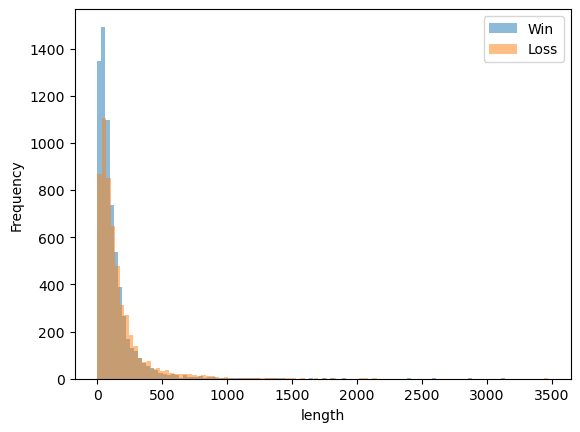

In [69]:
plt.figure()
df[df["Result"]=='Win']["Comment_Len"].plot.hist(bins=100, label='Win', alpha=.5)
df[df["Result"]=='Loss']["Comment_Len"].plot.hist(bins=100, label='Loss', alpha=.5)
plt.legend()
plt.xlabel('length')
plt.show()

In [70]:
# Plot Number of Comments Across time
df["Date"] = df["Date"].dt.date
df.head()

,Post_Name,Comment,Date,Result,Comment_Len
0,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,But have you considered Damian Lillard?,2023-10-26,Win,39
1,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Help yourself to a Dame flair :),2023-10-26,Win,32
2,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,"the most casual 30 point games in the nba, the...",2023-10-26,Win,122
3,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Dame regularly went nuclear with the most medi...,2023-10-26,Win,318
4,[POSTGAME THREAD] Our Milwaukee Bucks (1-0) de...,Wait until you see him get hot from 3 and star...,2023-10-26,Win,101


<Axes: >

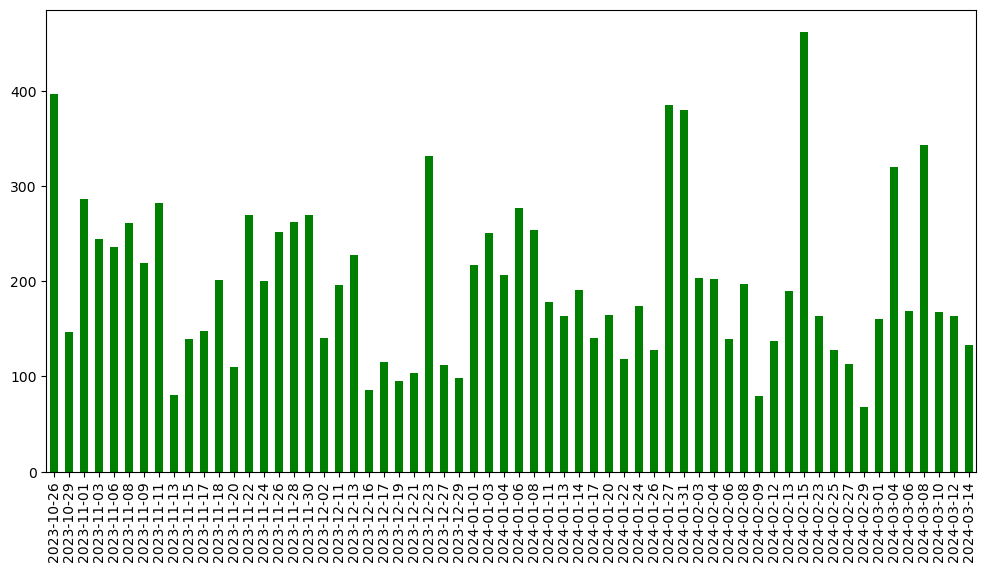

In [73]:
plt.figure(figsize=(12, 6))
colors = df['Result'].map({'Win': 'green', 'Loss': 'red'})
df['Date'].value_counts().sort_index().plot(kind='bar', color=colors)

In [71]:
df[df["Result"]=='Win']["Date"].plot(kind='bar', color="green")
df[df["Result"]=='Loss']["Date"].plot(kind='bar', color="red")
plt.legend()
plt.xlabel('length')
plt.show()

TypeError: no numeric data to plot

In [53]:
df["Post_Name"].value_counts()[:5]

[POSTGAME THREAD] Our Milwaukee Bucks (35 - 21) fall to the Memphis Grizzlies (20 - 36) - 110 - 113 - 2/15/2024                462
[POSTGAME THREAD] Our Milwaukee Bucks (1-0) defeat the Philadelphia 76ers (0-1) 118-117 in their season opener - 10/26/2023    396
[POSTGAME THREAD] Our Milwaukee Bucks (32 - 16) fall to the Portland Trailblazers (14 - 34) - 116 - 119 - 1/31/2024            380
[POSTGAME THREAD] Our Milwaukee Bucks (41 - 23) fall to The Los Angeles Lakers (35 - 30) - 122 - 123 - 3/8/2024                343
[POSTGAME THREAD] Our Milwaukee Bucks (41 - 21) defeat the Los Angeles Clippers (39 - 21) - 113 - 106 - 3/4/2024               320
Name: Post_Name, dtype: int64

## Featurize

In [18]:
def tokenize(document, strip_punct=True, ignore_case=True):
    # YOUR CODE HERE
    document = document.split()
    if strip_punct:
        for item in document:
            document = [re.sub(r'^\W+|\W+$', "", item) for item in document]
            
    if ignore_case:
        document = [item.lower() for item in document]

    return document

df["Tokens"] = [tokenize(d, strip_punct=True, ignore_case=True) for d in df["Comment"]]
df.head()    

,Post_Name,Comment,Date,Result,Tokens
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss,"[, , mil, 130, , 140, ind, box, scores, nba](h..."
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss,"[took, too, long, to, pull, brook, and, pat, o..."
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss,"[the, bucks, for, whatever, reason, look, like..."
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss,"[lmfao, if, brunson, tears, this, team, apart,..."
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss,"[hear, me, out, first, blessoe, then, jrue, sh..."


In [19]:
def featurize(tokens):
    # YOUR CODE HERE
    token_dict = {word: 1 for word in set(tokens)}
    return token_dict
    raise NotImplementedError()
df['raw_features'] = [featurize(t) for t in df["Tokens"]]
df.head()

,Post_Name,Comment,Date,Result,Tokens,raw_features
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss,"[, , mil, 130, , 140, ind, box, scores, nba](h...","{'': 1, 'jarace': 1, 'connaughton|14:11|3|1-3|..."
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss,"[took, too, long, to, pull, brook, and, pat, o...","{'minutes': 1, 'took': 1, 'giannis': 1, 'pull'..."
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss,"[the, bucks, for, whatever, reason, look, like...","{'they': 1, 'playing': 1, 'this': 1, 'we': 1, ..."
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss,"[lmfao, if, brunson, tears, this, team, apart,...","{'sick': 1, 'tears': 1, 'damn': 1, 'nuclear': ..."
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss,"[hear, me, out, first, blessoe, then, jrue, sh...","{'hope': 1, 'then': 1, 'me': 1, 'sequence': 1,..."


In [20]:
def count_word_document_frequency(dict_list):
    # YOUR CODE HERE
    counter = Counter()
    for dct in dict_list:
        counter.update(dct.keys())
    return counter
    raise NotImplementedError()
word_counts = count_word_document_frequency(df["raw_features"])

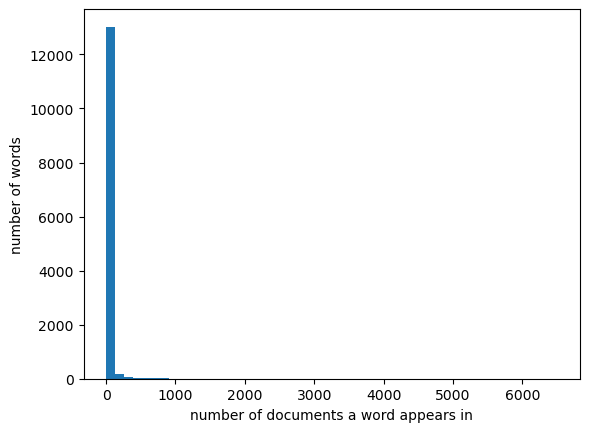

[(1, 6576), (2, 1764), (3, 935), (4, 596), (5, 389)]

In [21]:
plt.figure()
plt.hist(word_counts.values(), bins=50)
plt.xlabel('number of documents a word appears in')
plt.ylabel('number of words')
plt.show()
Counter(word_counts.values()).most_common(5)

In [22]:
word_counts.most_common(30)

[('the', 6501),
 ('a', 4524),
 ('to', 4405),
 ('and', 4047),
 ('is', 3157),
 ('in', 3148),
 ('i', 2979),
 ('of', 2914),
 ('that', 2723),
 ('this', 2432),
 ('it', 2253),
 ('for', 2209),
 ('but', 2171),
 ('we', 2149),
 ('on', 2114),
 ('he', 2068),
 ('was', 1974),
 ('game', 1946),
 ('with', 1720),
 ('be', 1685),
 ('dame', 1667),
 ('like', 1599),
 ('giannis', 1590),
 ('not', 1562),
 ('team', 1554),
 ('just', 1545),
 ('have', 1466),
 ('they', 1392),
 ('you', 1386),
 ('are', 1223)]

## Naive Bayes Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB

X = df["Stemmed"]
y = df["Result_Bin"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = make_pipeline(CountVectorizer(), BernoulliNB())

In [29]:
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
f1 = f1_score(y_test, y_pred)
print("Accuracy:", f1)

Accuracy: 0.6994500161759948


## Logistic Regression Model

In [30]:
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56      1069
           1       0.67      0.71      0.69      1385

    accuracy                           0.63      2454
   macro avg       0.63      0.62      0.62      2454
weighted avg       0.63      0.63      0.63      2454



## Convolutional Neural Network

In [35]:
from tensorflow.keras.preprocessing.text import one_hot

vocab_size = 5000

X_train = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d, vocab_size,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]

ModuleNotFoundError: No module named 'tensorflow'